# Analysis of game sales data

**Цель проекта:**

Проанализировать данные о продажах игр и выявить определяющие успешность игры закономерности

**Описание данных:**

- _Name_ — название игры
- _Platform_ — платформа
- _Year_of_Release_ — год выпуска
- _Genre_ — жанр игры
- _NA_sales —_ продажи в Северной Америке (миллионы проданных копий)
- _EU_sales_ — продажи в Европе (миллионы проданных копий)
- _JP_sales_ — продажи в Японии (миллионы проданных копий)
- _Other_sales —_ продажи в других странах (миллионы проданных копий)
- _Critic_Score_ — оценка критиков (максимум 100)
- _User_Score_ — оценка пользователей (максимум 10)
- _Rating_ — рейтинг от организации _ESRB_ (англ. _Entertainment Software Rating Board)._ Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План проекта:**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

## Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
# чтение данных
try:
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Project 1/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

### Изучение данных

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Выводы:
- Название колонок написаны с заглавными буквами, их необходимо переименовать;
- Данные содержат пропуски, особенно много пропусков в оценках игр и рейтинге;
- Есть неправильные типы данных в столбцах: Critic_Score и User_Score;
    - User_Score можно домножить на 10 для упрощения сравнения оценок критиков и пользователей.

## Предобработка данных

### Изменение названий столбцов

In [6]:
# изменение названия колонок
data.columns = data.columns.str.lower()

In [7]:
# проверка названия колонок
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка дубликатов

Среди данных необходимо проверить наличие полных дубликатов и дубликатов игр по названию, году и платформе. Такие дубликаты необходимо удалить, чтобы они не искажали выводы.

In [8]:
# удаление полных дубликатов
data = data.drop_duplicates()
print(data[data.duplicated(['name', 'platform', 'year_of_release'])].count())
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])
print(data[data.duplicated(['name', 'platform', 'year_of_release'])].count())

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


### Преобразование типов данных

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбцах оценки пользователей и критиков много пропусков. Заполнить их средним или медианным значением не целесообразно, так как оценка игр выполняется индивидуально для каждой игры и заполнение средним исказит выводы.

Пропуски могли возникнуь по следующим причинам:
- Игры ещё не были оценены
- Исходные данные неполные

Пропущенные данные решено заменить заглушкой - '-1'.

Среди оценок пользователей есть оценка tbd - to be determined/пока не определена. Данную оценку можно приравнивать к отсутствию оценки.

In [10]:
# удаление пропусков в critic_score и user_score
data.loc[data['critic_score'].isna(), 'critic_score'] = -1

data.loc[data['user_score'].isna(), 'user_score'] = -1
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

print(data['critic_score'].unique())
data['user_score'].unique()

[76. -1. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Оценки критиков предствалены целыми значеними, тип даннных необходимо изменить на int
Оценки пользователей представлены от 0 до 10. Для удобства сравнения их можно домножить на 10 и изменить тип данных на int

In [11]:
# изменение типа данных в critic_score и user_score
data['critic_score'] = data['critic_score'].astype(int)
data['user_score'] = ((data['user_score'].astype(float))*10).astype(int)
data.loc[data['user_score'] == -10, 'user_score'] = -1

In [12]:
data['user_score'].unique()

array([80, -1, 83, 85, 66, 84, 86, 77, 63, 74, 82, 90, 79, 81, 87, 71, 34,
       53, 48, 32, 89, 64, 78, 75, 26, 72, 92, 70, 73, 43, 76, 57, 50, 91,
       65, 88, 69, 94, 68, 61, 67, 54, 40, 49, 45, 93, 62, 42, 60, 37, 41,
       58, 56, 55, 44, 46, 59, 39, 31, 29, 52, 33, 47, 51, 35, 25, 19, 30,
       27, 22, 20, 95, 21, 36, 28, 18, 38,  0, 16, 96, 24, 17, 11,  3, 15,
        7, 12, 23,  5, 13,  2,  6, 14,  9, 10, 97])

In [13]:
# проверка типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           9948 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Обработка пропусков

В колонке рейтинга большое количество пропусков. Рейтинг выставляется организацией по каждой игре индивидуально, это значит, что мы не можем воспользоваться заполнением средним или медианым значением.

Пропуски решено заполнить заглушкой - '-1'

In [14]:
data.loc[data['rating'].isna(), 'rating'] = -1

Колонки name, genre и year_of_release содержат пропуски, котрые нельзя заполнить. Данных с пропусками около 1%, их можно удалить.

Пропуски в колонке рейтинга заполнить не представляется возможным, так как это значение присваивают по различным критериям.

In [15]:
data = data.dropna(subset=['name', 'genre', 'year_of_release'])

In [16]:
# проверка пропусков
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [17]:
# создание столбца с суммой продац игр
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1,-1,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,-1,31.38


### Выводы:
- Среди данных были обнаружены дубликаты игр. Дубликаты были удалены;
- Выполнено преименование столбцов, все названия переписаны с нижним регистром;
- Типы данных в колонках были изменены на корректные;
- Обработаны пропуски в колонаках:
    - Незначительное количество пропусков, которые невозможно было восстановить, удалены;
    - Пропусков в оценках пользователей и критиков много, они заменены на значение '-1'
    - Пропуски в рейтингах восстановить не представляется возможным и их очень много. Они оставлены без изменений.

## Исследовательский анализ данных

### Количество игр, выпущенных в разные годы

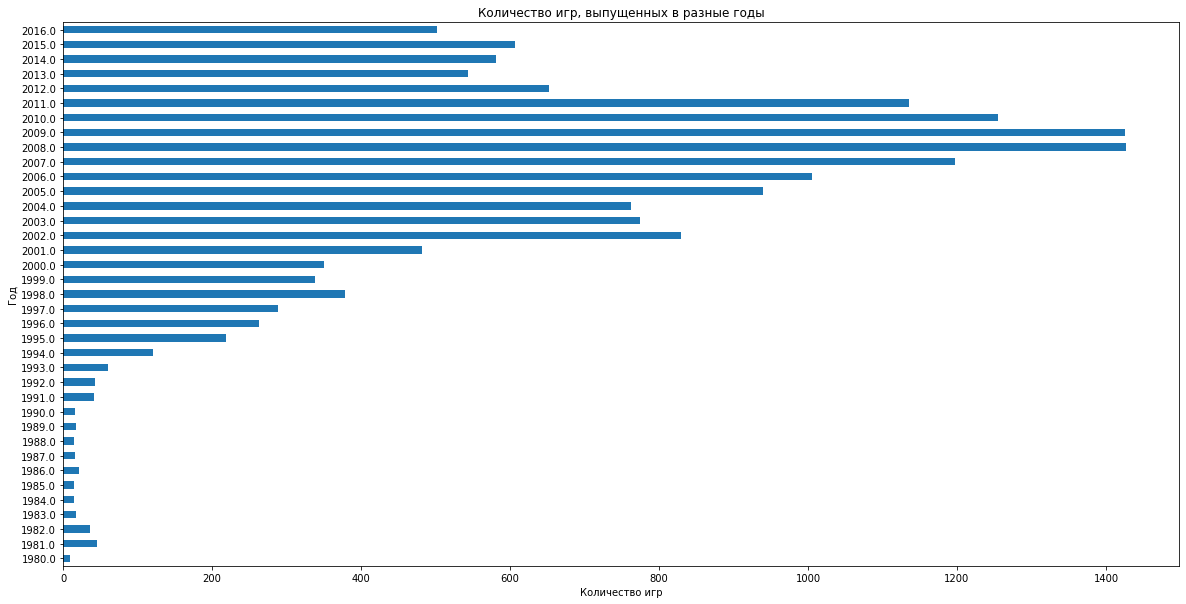

In [18]:
data.groupby('year_of_release')['year_of_release'].count().plot(
    title='Количество игр, выпущенных в разные годы',
    kind = 'barh',
    figsize = (20,10),
    legend = False
)
plt.ylabel('Год')
plt.xlabel('Количество игр')
plt.show()

In [19]:
data.groupby('year_of_release')['year_of_release'].count().describe()

count      37.000000
mean      444.405405
std       451.591535
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

In [20]:
# сохранение релевантных данных
df_relevant = data[data['year_of_release'] >= 1991]

**Выводы:**
- График количичества игр в разные годы показывает, что до 1994 года игр выходило мало. После их значение выросло в 2 раза (60 игр в 1993 г. и 121 игра в 1994 г.) и с каждым годом увеличивалось до 2008 года (1427 игры) и после начало уменьшаться;
- Данные до 1991 года (до 1 квартиля) можно не учитывать, так как игр выходило оченьзможным и их очень много. Они оставлены без изменений.

### Продажи по платформам

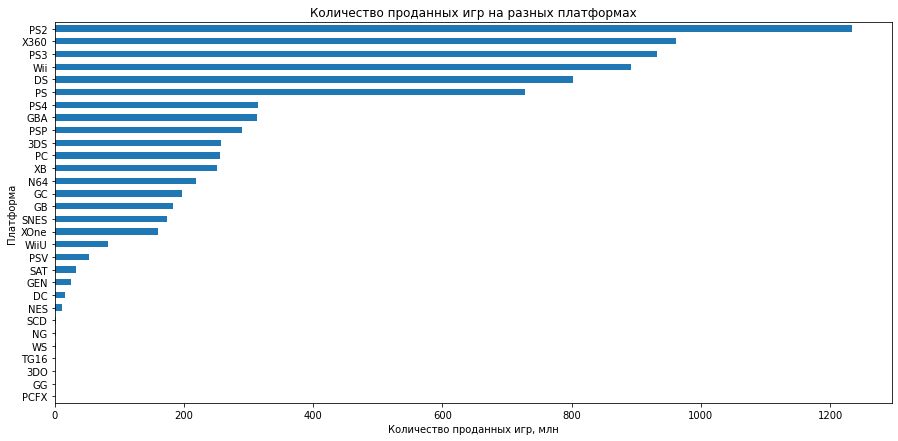

In [21]:
df_relevant.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales')\
.plot(
    title='Количество проданных игр на разных платформах',
    kind = 'barh',
    figsize = (15,7),
    legend = False
)
plt.ylabel('Платформа')
plt.xlabel('Количество проданных игр, млн')
plt.show()

In [22]:
# список наиболее продаваемых платформ
platform_name = df_relevant.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales', ascending=False).head(6)
platform_name = platform_name.index
platform_name

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')


    AxesSubplot(0.125,0.125;0.775x0.755)


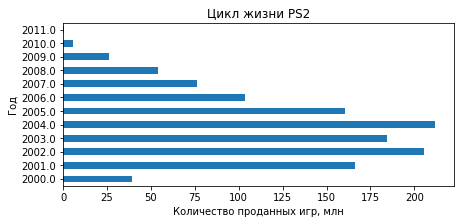


    AxesSubplot(0.125,0.125;0.775x0.755)


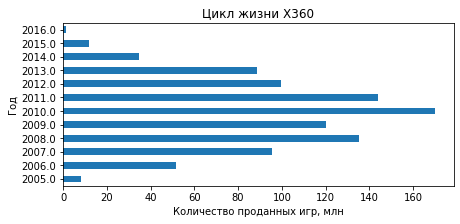


    AxesSubplot(0.125,0.125;0.775x0.755)


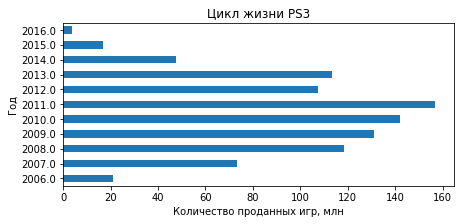


    AxesSubplot(0.125,0.125;0.775x0.755)


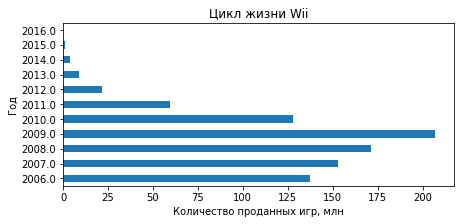


    AxesSubplot(0.125,0.125;0.775x0.755)


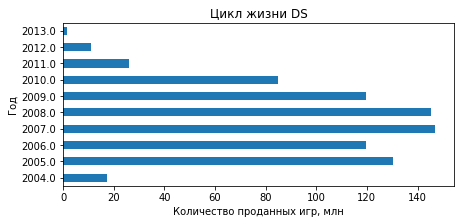


    AxesSubplot(0.125,0.125;0.775x0.755)


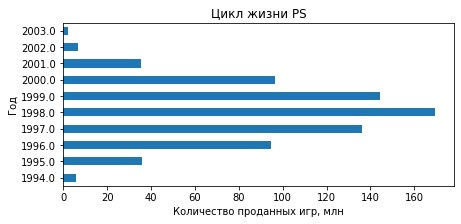

In [23]:
# графики цикла жизни наиболее продаваемых платформ
data_platform = df_relevant[df_relevant['platform'].isin(platform_name)]
data_platform_table = data_platform.pivot_table(
    index=('platform', 'year_of_release'), values='total_sales', aggfunc='sum'
)

for platform in platform_name:
    print(f'''
    {data_platform_table.loc[platform].plot(
    kind = 'barh',
    figsize = (7,3),
    legend = False
    )}''')
    plt.title(f'Цикл жизни {platform}')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр, млн')
    plt.show()

In [24]:
# таблица цикла жизни платформ
data_platform = data_platform.pivot_table(index='platform', values='year_of_release', aggfunc=('min', 'max'))
data_platform['cycle'] = data_platform['max'] - data_platform['min']
data_platform

,max,min,cycle
platform,,,
DS,2013.0,2004.0,9.0
PS,2003.0,1994.0,9.0
PS2,2011.0,2000.0,11.0
PS3,2016.0,2006.0,10.0
Wii,2016.0,2006.0,10.0
X360,2016.0,2005.0,11.0


**Выводы:**
- Цикл жизни самых популярных платформ в среднем 10 лет;
- Пик популярности платформ приходится на середину их жизни (4 или 5 год).

### Определение актуального периода

На основании проведенного анализа можно утверждать, что наиболее актуальными будут данные за последние 10 лет.

Данный период поможет рассмотреть актуальные данные по играм. Данные в периоде покажут устоявшиеся тренды на популярных платформах и помогут выявить новые развивающиеся платформы, на которые стоит обратить внимание.

In [25]:
df_relevant = df_relevant[df_relevant['year_of_release'] >= 2014]
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   int64  
 9   user_score       1689 non-null   int64  
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 171.5+ KB


### Поиск потенциально выгодных платформ

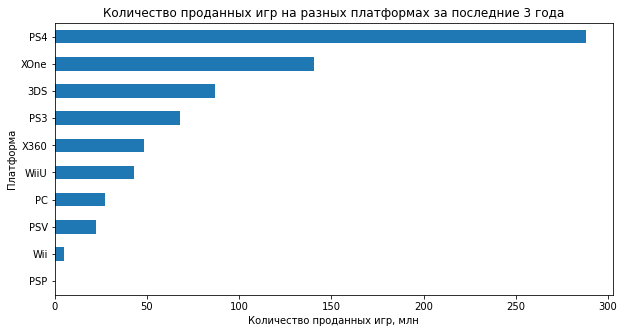

In [26]:
df_relevant.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales')\
.plot(
    title='Количество проданных игр на разных платформах за последние 3 года',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Платформа')
plt.xlabel('Количество проданных игр, млн')
plt.show()


    AxesSubplot(0.125,0.125;0.775x0.755)


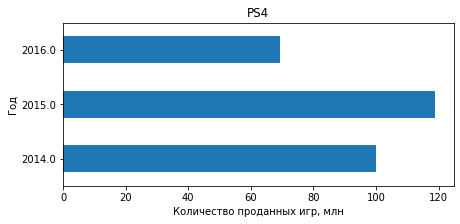


    AxesSubplot(0.125,0.125;0.775x0.755)


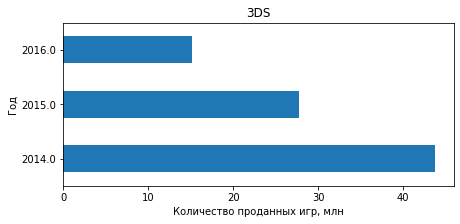


    AxesSubplot(0.125,0.125;0.775x0.755)


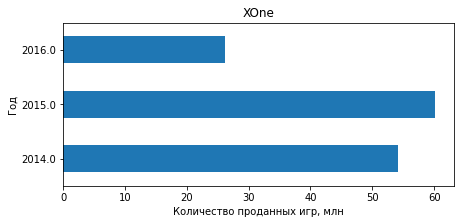


    AxesSubplot(0.125,0.125;0.775x0.755)


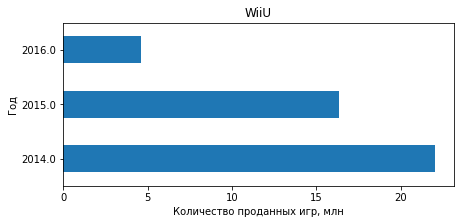


    AxesSubplot(0.125,0.125;0.775x0.755)


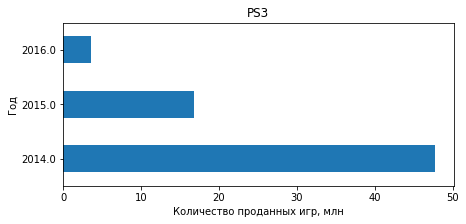


    AxesSubplot(0.125,0.125;0.775x0.755)


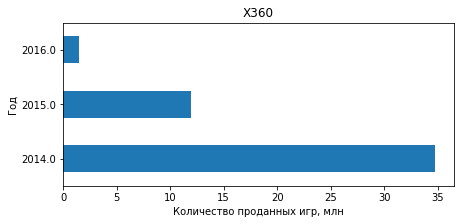


    AxesSubplot(0.125,0.125;0.775x0.755)


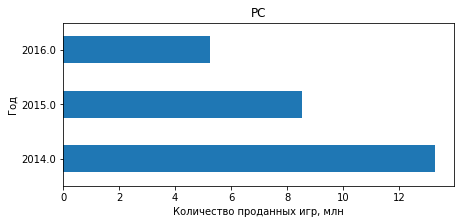


    AxesSubplot(0.125,0.125;0.775x0.755)


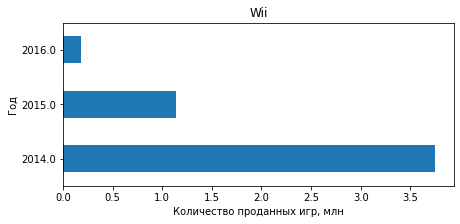


    AxesSubplot(0.125,0.125;0.775x0.755)


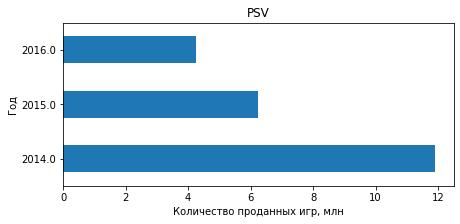


    AxesSubplot(0.125,0.125;0.775x0.755)


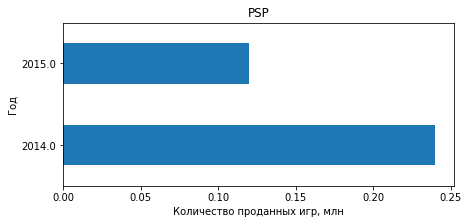

In [27]:
# графики продаж различных платформ по годам
platform_name = df_relevant['platform'].unique()
df_platform_table = df_relevant.pivot_table(
    index=('platform', 'year_of_release'), values='total_sales', aggfunc='sum'
)

for platform in platform_name:
    print(f'''
    {df_platform_table.loc[platform].plot(
    kind = 'barh',
    figsize = (7,3),
    legend = False
    )}''')
    plt.title(platform)
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр, млн')
    plt.show()

### **Выводы:**
- Потенциально прибыльные платформы: PS4 и XOne;
- Остальные платформы теряют актуальность;
- Игры на PSP перестали продаваться после 2015 года.

### Анализ глобальных продаж

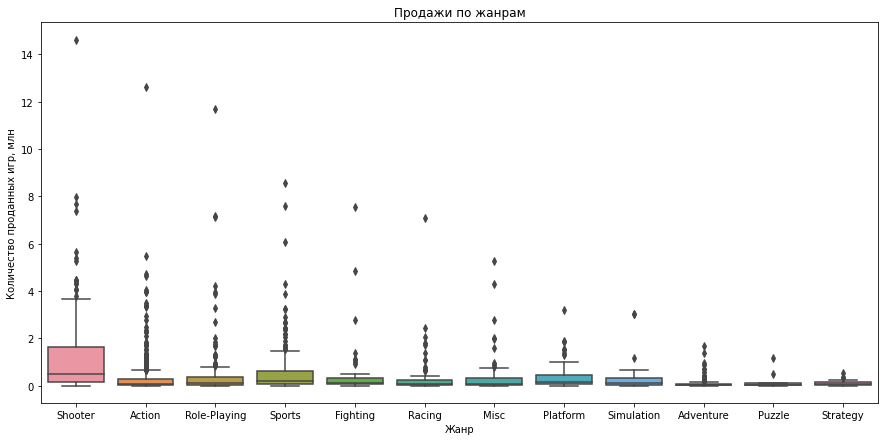

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(
    data=df_relevant,
    x='genre',
    y='total_sales',
)
plt.title('Продажи по жанрам')
plt.ylabel('Количество проданных игр, млн')
plt.xlabel('Жанр')
plt.show()

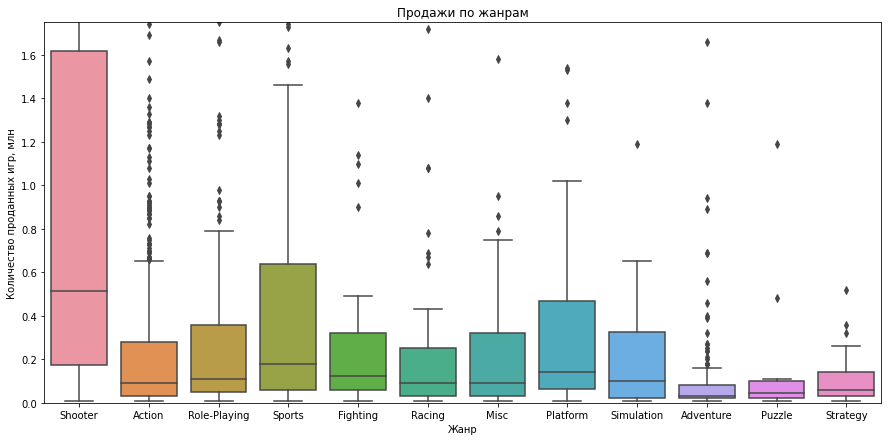

In [29]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(
    data=df_relevant,
    x='genre',
    y='total_sales'
)
ax.set(ylim=(0,1.75))
plt.title('Продажи по жанрам')
plt.ylabel('Количество проданных игр, млн')
plt.xlabel('Жанр')
plt.show()

**Выводы:** наиболее востребованными являются Sports, Shooter. Их медианны обладают наибольшими значениями прибыли.

### Влияние отзывов на продажи

#### Влияние оценок критиков на продажи игр

Корреляция между оценками критиков и продажами игр для PS3 - 0.45


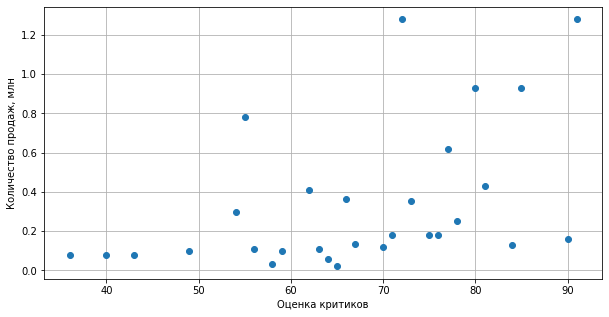

Корреляция между оценками критиков и продажами игр для PS4 - 0.4


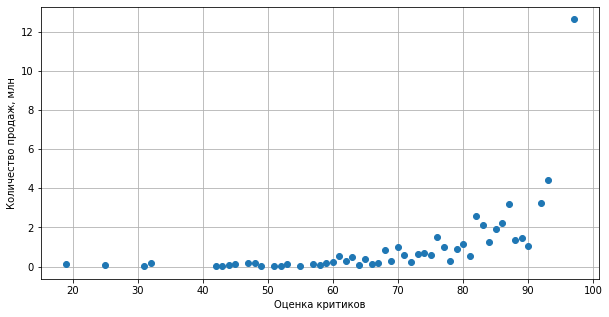

Корреляция между оценками критиков и продажами игр для X360 - 0.53


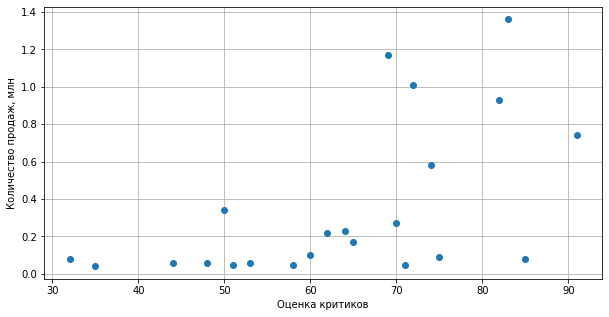

Корреляция между оценками критиков и продажами игр для XOne - 0.43


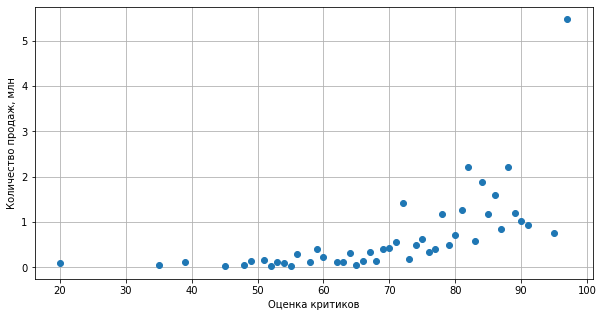

In [30]:
platform_name = ['PS3', 'PS4', 'X360', 'XOne']

for name in platform_name:
    df_platform = df_relevant[(df_relevant['critic_score'] > -1) & (df_relevant['platform'] == name)]

    print(f'''Корреляция между оценками критиков и продажами игр для {name} - {
            df_platform['critic_score'].corr(df_platform['total_sales']).round(2)
    }''')

    # диаграмма рассеивания
    df_platform.pivot_table(index='critic_score', values='total_sales')\
    .plot(
        style='o',
        grid=True,
        figsize=(10, 5),
        legend=False
    )
    plt.ylabel('Количество продаж, млн')
    plt.xlabel('Оценка критиков')
    plt.show()

#### Влияние оценок пользователей на продажи игр

Корреляция между оценками пользователей и продажами игр для PS3 - -0.17


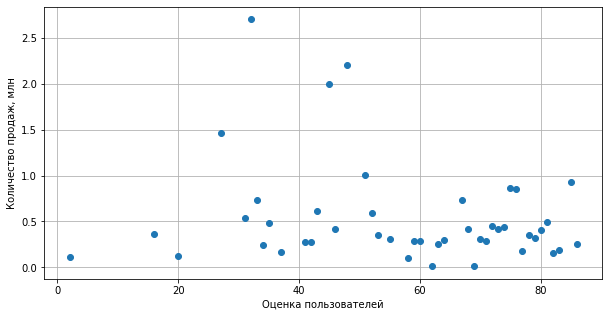

Корреляция между оценками пользователей и продажами игр для PS4 - -0.04


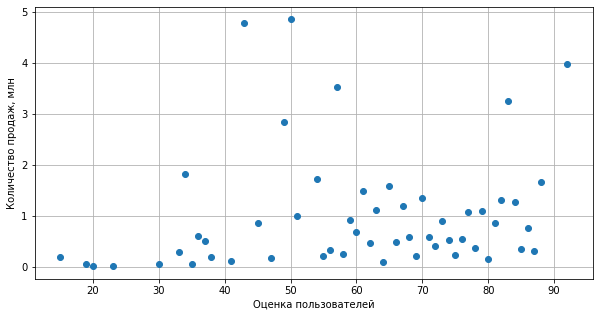

Корреляция между оценками пользователей и продажами игр для X360 - -0.14


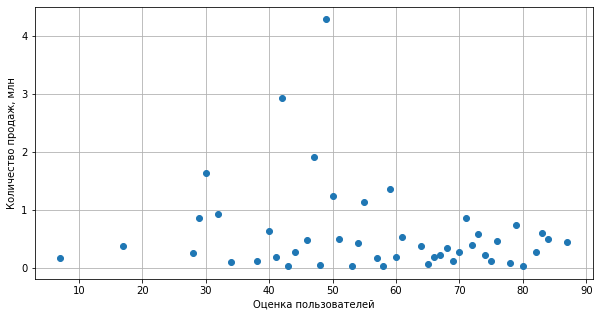

Корреляция между оценками пользователей и продажами игр для XOne - -0.07


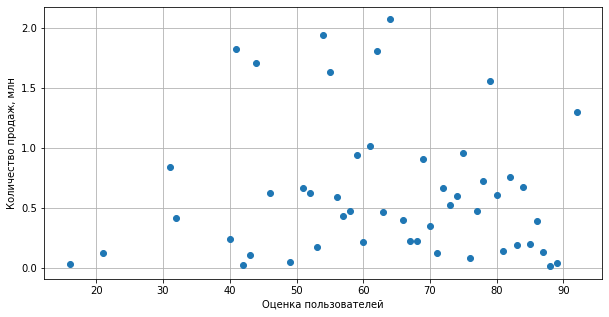

In [31]:
for name in platform_name:
    df_platform = df_relevant[(df_relevant['user_score'] > -1) & (df_relevant['platform'] == name)]

    print(f'''Корреляция между оценками пользователей и продажами игр для {name} - {
            df_platform['user_score'].corr(df_platform['total_sales']).round(2)
    }''')

    # диаграмма рассеивания
    df_platform.pivot_table(index='user_score', values='total_sales')\
    .plot(
        style='o',
        grid=True,
        figsize=(10, 5),
        legend=False
    )
    plt.ylabel('Количество продаж, млн')
    plt.xlabel('Оценка пользователей')
    plt.show()

#### Выводы:
- Корреляция между оценками критиков и продажами игр на самых популярных и перспективных платформах слабая.
- Корреляция между оценками пользователей и продажами игр отсуствует;

### Изучение разных жанров игр

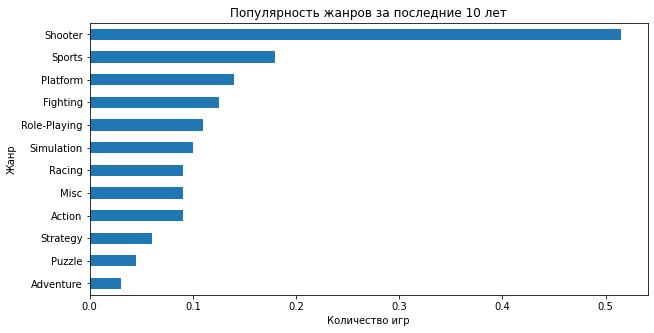

In [32]:
df_relevant.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values('total_sales')\
.plot(
    title='Популярность жанров за последние 10 лет',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Жанр')
plt.xlabel('Количество игр')
plt.show()

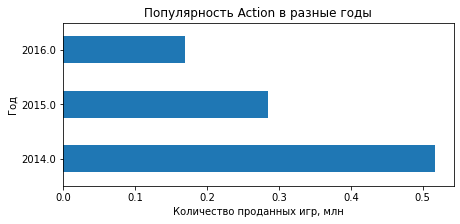

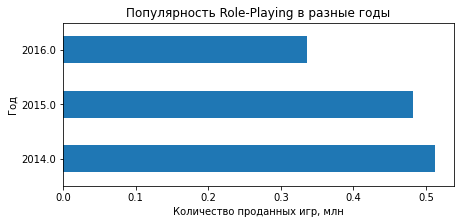

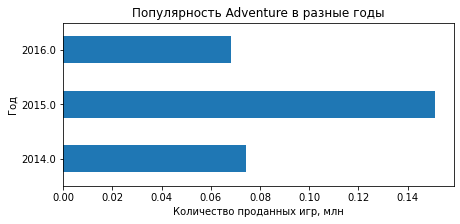

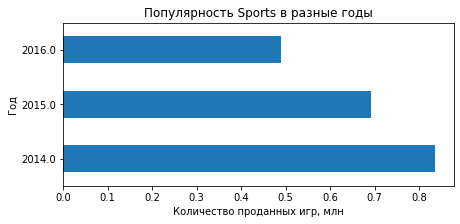

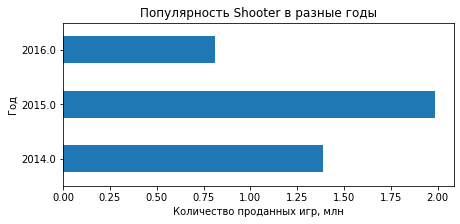

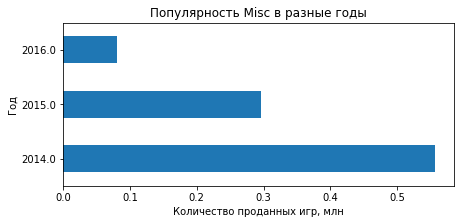

In [33]:
# графики популярности жанров за различные годы
for genre in df_relevant['genre'].value_counts().head(6).index:
    df_relevant[df_relevant['genre'] == genre].pivot_table(index='year_of_release', values='total_sales')\
    .plot(
        kind = 'barh',
        figsize = (7,3),
        legend = False
    )
    plt.title(f'Популярность {genre} в разные годы')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр, млн')
    plt.show()

### Выводы:
- Оценка выхода игр в разные годы показала, что игр до 1991 года выходило мало, а после росло до 2016 года. Затем наблюдается спад до ровня начала 2000-х;
- Анализ платформ покащал, что наиболее популярные за все время платформы - PS2, Xbox 360, PS3, Wii, DS, PS. Цикл жизни самых популярных платформ в среднем 10 лет. Пик популярности платформ приходится на середину их жизни (4 или 5 год);
- На основании проведенного анализа можно утверждать, что наиболее актуальными будут данные за последние 10 лет.
Данный период поможет рассмотреть актуальные данные по играм. Данные в периоде покажут устоявшиеся тренды на популярных платформах и помогут выявить новые развивающиеся платформы, на которые стоит обратить внимание;
- Анализ наиболее популярных платформ за последние 10 лет выявил популярность PS3 и X360. Однако эти платформы уже теряют актуальность и им на смену приходят потенциально прибыльные платформы: PS4 и XOne
- Корреляция между оценками критиков и продажами игр на самых популярных и перспективных платформах слабая. Корреляция между оценками пользователей и продажами игр отсуствует;
- Среди всех жанров наиболее популярны: шутеры, спорт, платформеры, файтинги, ролевые игры.

## Портреты пользователей

In [34]:
print('Количество проданных игр в Северной Америке -', df_relevant['na_sales'].sum().round(2))
print('Количество проданных игр в Европе -', df_relevant['eu_sales'].sum().round(2))
print('Количество проданных игр в Японии -', df_relevant['jp_sales'].sum())

Количество проданных игр в Северной Америке - 284.06
Количество проданных игр в Европе - 270.68
Количество проданных игр в Японии - 93.09


### Северная Америка (NA)

#### Самые популярные платформы

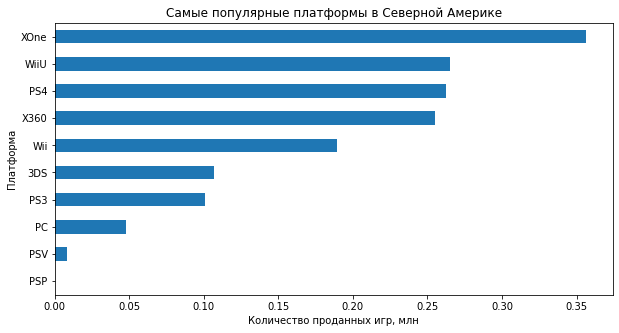

In [35]:
# рейтинг популярных платформ
df_relevant.pivot_table(index='platform', values='na_sales')\
.sort_values('na_sales')\
.plot(
    title='Самые популярные платформы в Северной Америке',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Платформа')
plt.xlabel('Количество проданных игр, млн')
plt.show()

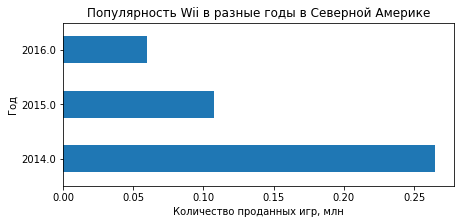

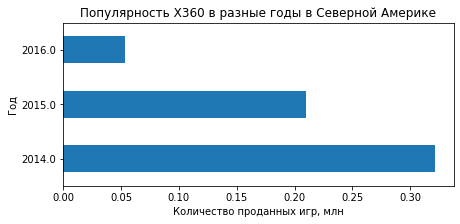

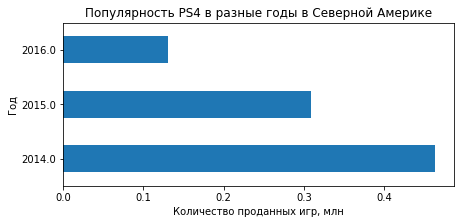

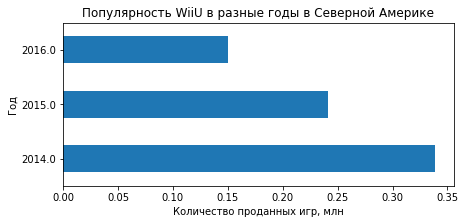

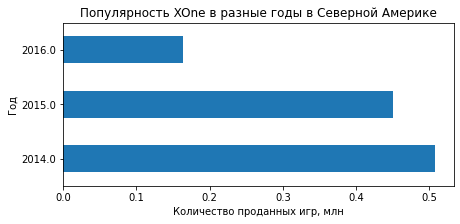

In [36]:
# графики 5 самых популярных платформ за различные годы
for platform in df_relevant.pivot_table(index='platform', values='na_sales').sort_values('na_sales').tail(5).index:
    df_relevant[df_relevant['platform'] == platform]\
    .pivot_table(index='year_of_release', values='na_sales')\
    .plot(
        kind = 'barh',
        figsize = (7,3),
        legend = False
    )
    plt.title(f'Популярность {platform} в разные годы в Северной Америке')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр, млн')
    plt.show()

#### Самые популярные жанры

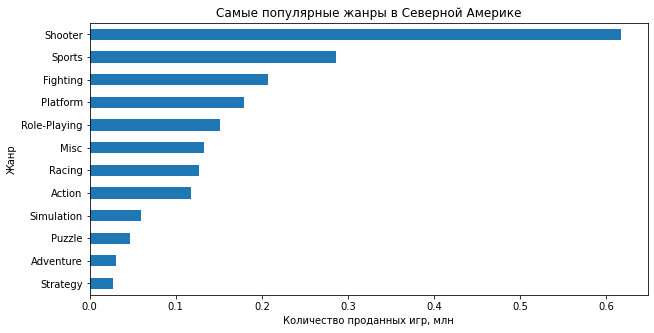

In [37]:
# рейтинг популярных жанров
df_relevant.pivot_table(index='genre', values='na_sales')\
.sort_values('na_sales')\
.plot(
    title='Самые популярные жанры в Северной Америке',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Жанр')
plt.xlabel('Количество проданных игр, млн')
plt.show()

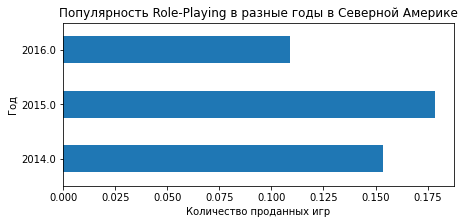

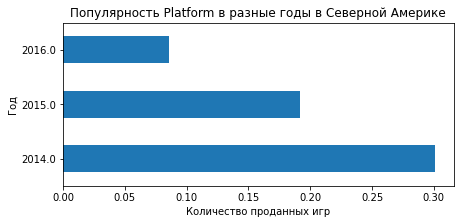

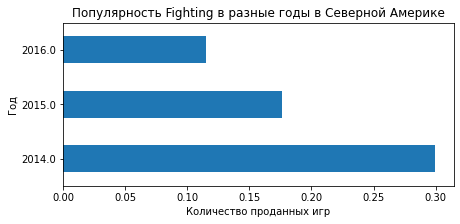

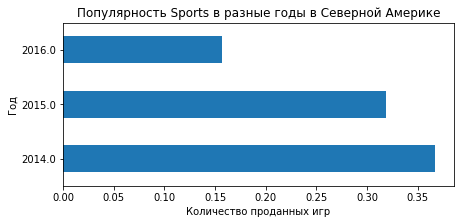

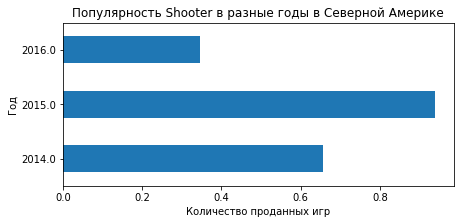

In [38]:
# графики 5 самых популярных жанров за различные годы
for genre in df_relevant.pivot_table(index='genre', values='na_sales').sort_values('na_sales').tail(5).index:
    df_relevant[df_relevant['genre'] == genre]\
    .pivot_table(index='year_of_release', values='na_sales')\
    .plot(
        kind = 'barh',
        figsize = (7,3),
        legend = False
    )
    plt.title(f'Популярность {genre} в разные годы в Северной Америке')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр')
    plt.show()

#### Влияние рейтинга ESRB

_ESRB (Entertainment Software Rating Board)_ - это ассоциация, определяющая возрастной рейтинг компьютерных игр. _ESRB_ оценивает игровой контент и присваивает ему подходящую возрастную категорию.

По итогам рассмотрения игра может получить одну из пяти возможных маркировок:
- Е (Everyone) — для всех возрастов.
- EC (Early childhood) — для детей младшего возраста от 3 лет.
- E10+ (Everyone 10 and older) — для детей от 10 лет и старше.
- Т (Teen) — для подростков от 13 лет.
- М (Mature) — для взрослой аудитории от 17 лет и старше.
- АО (Adults Only) — для взрослой аудитории от 18 лет.

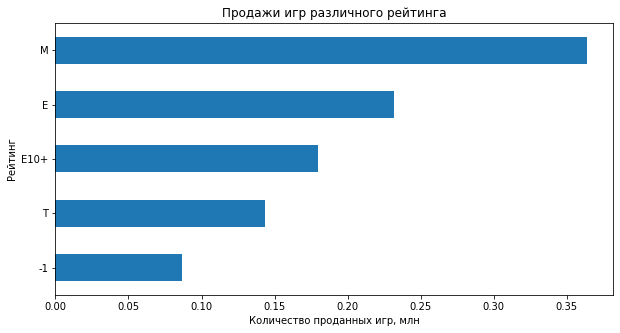

In [53]:
# влияние рейтинга ESRB на количество продаж
df_relevant.pivot_table(index='rating', values='na_sales')\
.sort_values('na_sales')\
.plot(
    title='Продажи игр различного рейтинга',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Рейтинг')
plt.xlabel('Количество проданных игр, млн')
plt.show()

### Европа (EU)

#### Самые популярные платформы

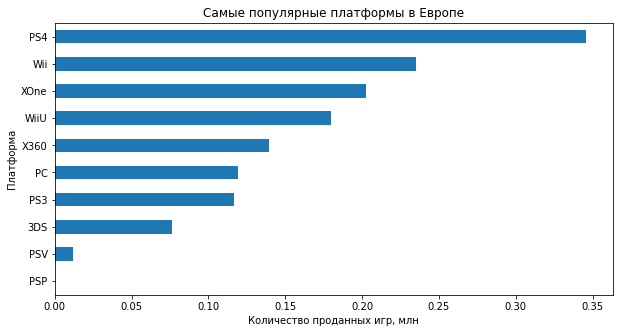

In [40]:
# рейтинг популярных платформ
df_relevant.pivot_table(index='platform', values='eu_sales')\
.sort_values('eu_sales')\
.plot(
    title='Самые популярные платформы в Европе',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Платформа')
plt.xlabel('Количество проданных игр, млн')
plt.show()

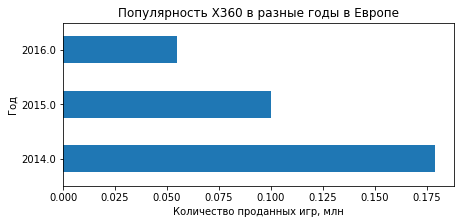

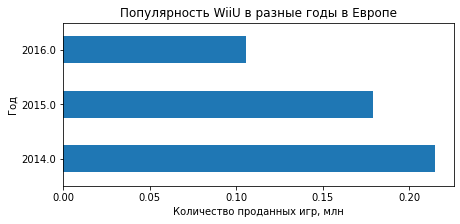

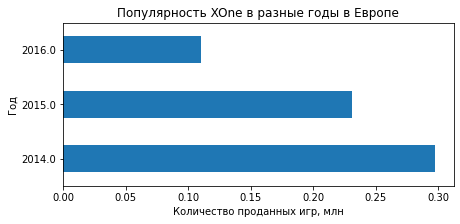

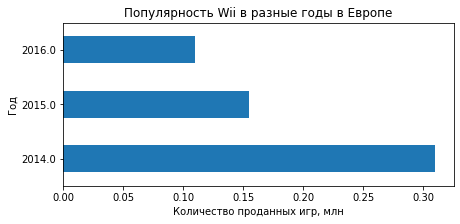

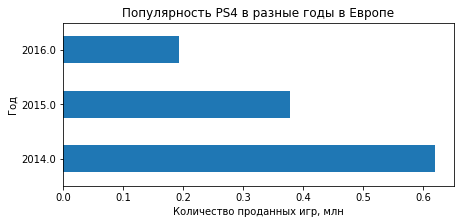

In [41]:
# графики 5 самых популярных платформ за различные годы
for platform in df_relevant.pivot_table(index='platform', values='eu_sales').sort_values('eu_sales').tail(5).index:
    df_relevant[df_relevant['platform'] == platform]\
    .pivot_table(index='year_of_release', values='eu_sales')\
    .plot(
        kind = 'barh',
        figsize = (7,3),
        legend = False
    )
    plt.title(f'Популярность {platform} в разные годы в Европе')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр, млн')
    plt.show()

#### Самые популярные жанры

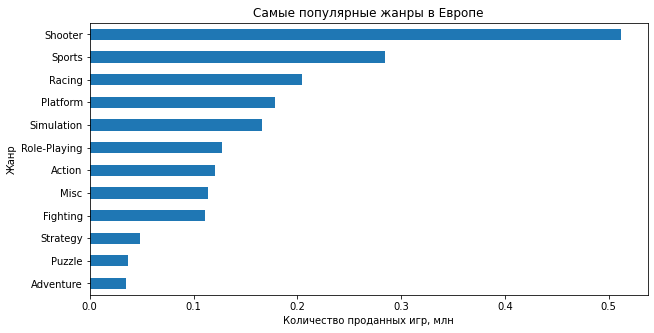

In [42]:
# рейтинг популярных жанров
df_relevant.pivot_table(index='genre', values='eu_sales')\
.sort_values('eu_sales')\
.plot(
    title='Самые популярные жанры в Европе',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Жанр')
plt.xlabel('Количество проданных игр, млн')
plt.show()

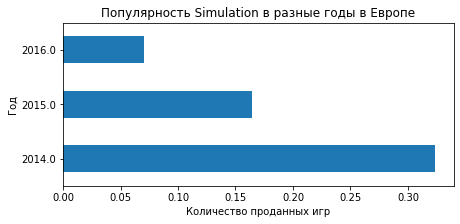

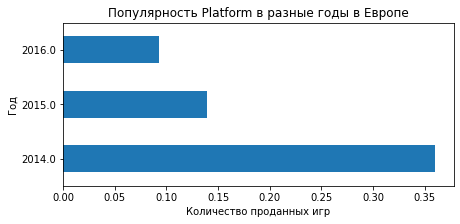

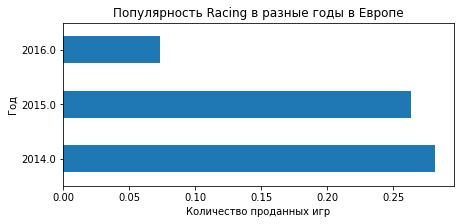

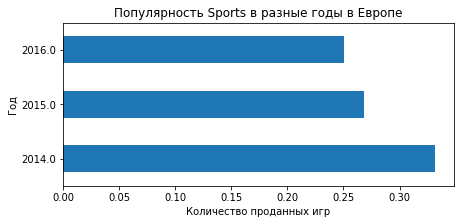

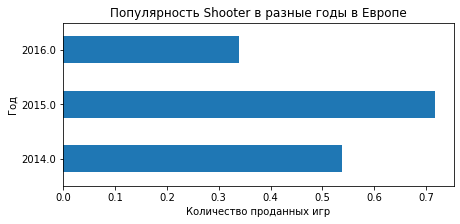

In [43]:
# графики 5 самых популярных жанров за различные годы
for genre in df_relevant.pivot_table(index='genre', values='eu_sales').sort_values('eu_sales').tail(5).index:
    df_relevant[df_relevant['genre'] == genre]\
    .pivot_table(index='year_of_release', values='eu_sales')\
    .plot(
        kind = 'barh',
        figsize = (7,3),
        legend = False
    )
    plt.title(f'Популярность {genre} в разные годы в Европе')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр')
    plt.show()

#### Влияние рейтинга ESRB

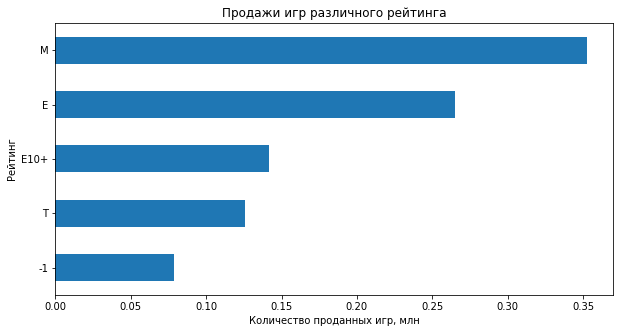

In [54]:
# влияние рейтинга ESRB на количество продаж
df_relevant.pivot_table(index='rating', values='eu_sales')\
.sort_values('eu_sales')\
.plot(
    title='Продажи игр различного рейтинга',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Рейтинг')
plt.xlabel('Количество проданных игр, млн')
plt.show()

### Япония (JP)

#### Самые популярные платформы

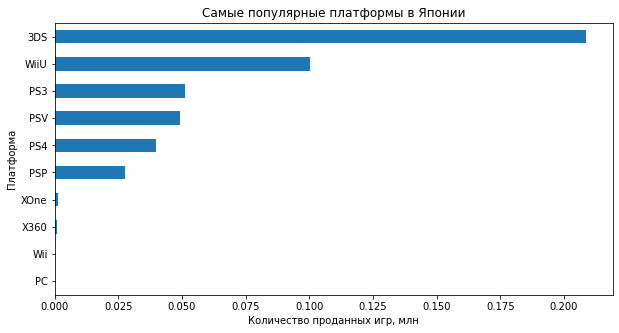

In [45]:
# рейтинг популярных платформ
df_relevant.pivot_table(index='platform', values='jp_sales')\
.sort_values('jp_sales')\
.plot(
    title='Самые популярные платформы в Японии',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Платформа')
plt.xlabel('Количество проданных игр, млн')
plt.show()

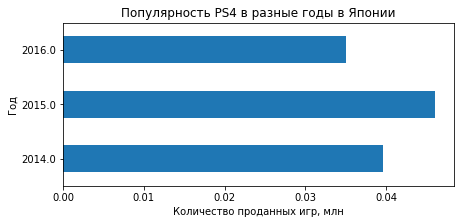

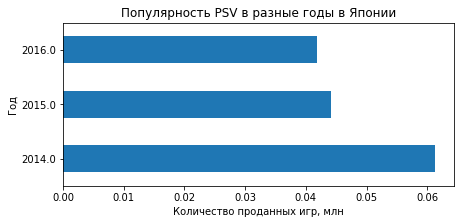

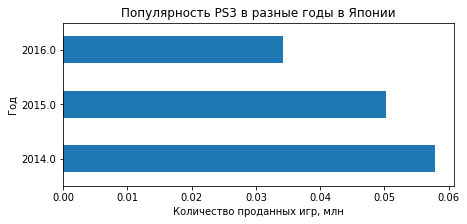

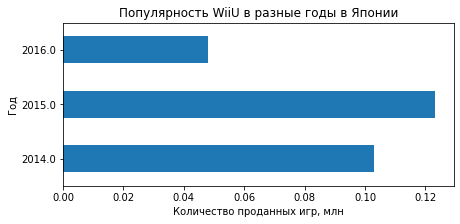

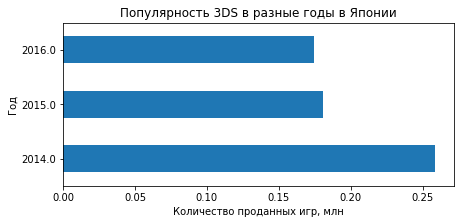

In [46]:
# графики 5 самых популярных платформ за различные годы
for platform in df_relevant.pivot_table(index='platform', values='jp_sales').sort_values('jp_sales').tail(5).index:
    df_relevant[df_relevant['platform'] == platform]\
    .pivot_table(index='year_of_release', values='jp_sales')\
    .plot(
        kind = 'barh',
        figsize = (7,3),
        legend = False
    )
    plt.title(f'Популярность {platform} в разные годы в Японии')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр, млн')
    plt.show()

#### Самые популярные жанры

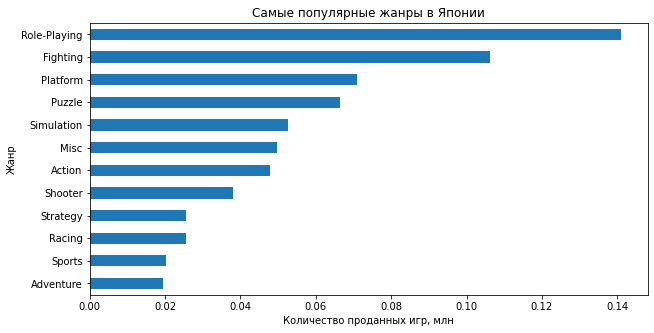

In [47]:
# рейтинг популярных жанров
df_relevant.pivot_table(index='genre', values='jp_sales')\
.sort_values('jp_sales')\
.plot(
    title='Самые популярные жанры в Японии',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Жанр')
plt.xlabel('Количество проданных игр, млн')
plt.show()

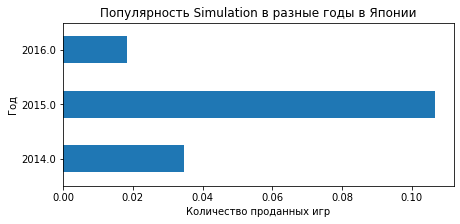

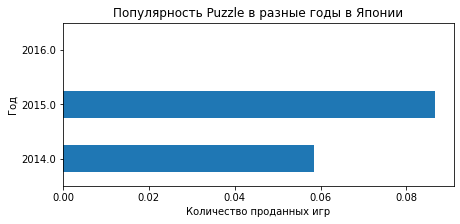

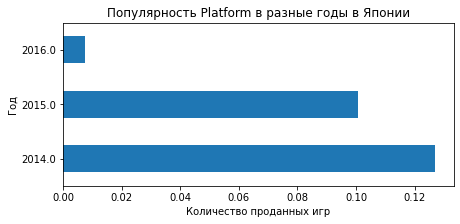

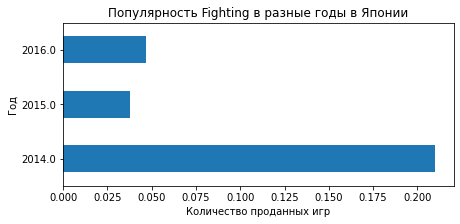

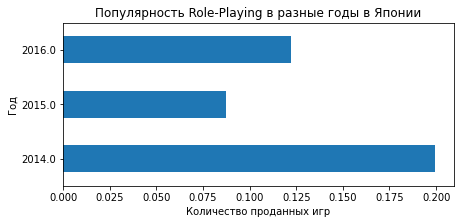

In [48]:
# графики 5 самых популярных жанров за различные годы
for genre in df_relevant.pivot_table(index='genre', values='jp_sales').sort_values('jp_sales').tail(5).index:
    df_relevant[df_relevant['genre'] == genre]\
    .pivot_table(index='year_of_release', values='jp_sales')\
    .plot(
        kind = 'barh',
        figsize = (7,3),
        legend = False
    )
    plt.title(f'Популярность {genre} в разные годы в Японии')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных игр')
    plt.show()

#### Влияние рейтинга ESRB

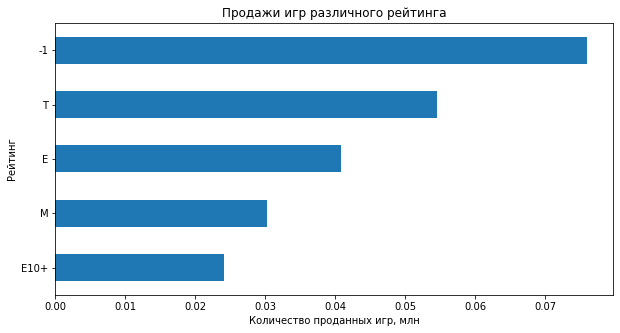

In [55]:
# влияние рейтинга ESRB на количество продаж
df_relevant.pivot_table(index='rating', values='jp_sales')\
.sort_values('jp_sales')\
.plot(
    title='Продажи игр различного рейтинга',
    kind = 'barh',
    figsize = (10,5),
    legend = False
)
plt.ylabel('Рейтинг')
plt.xlabel('Количество проданных игр, млн')
plt.show()

### Выводы:
**Портрет пользователя Северной Америки**

- Самые популярные платформы: Xbox One, WiiU, PS4, Xbox 360, Wii;
- Наиболее популярны жанры: шутеры, спорт, файтинг, платформеры, ролевые игры. Потенциально прибыльны: ролевые игры и шутеры;
- По рейтингу ESRB наиболее продаваемыми являются игры рейтинга M (от 17 лет). Наименее продаваемы игры рейтинга T (от 13 лет)


**Портрет пользователя Европы**
- Самые популярные жанры: PS4, Wii, XboxOne, WiiU, Xbox 360;
- Наиболее популярные жанры: шутеры, спорт, горки, платформеры и симуляторы. Потенциально прибыльны: спорт и шутеры;
- По рейтингу ESRB наиболее продаваемыми являются игры рейтинга M (от 17 лет). Наименее продаваемы игры рейтинга T (от 13 лет);

**Портрет пользователя Японии**
- Самые популярные жанры: 3DS, WiiU, PS3, PSV, PS4;
- Наиболее популярные жанры: ролевые, файтинги, платформеры, пазлы и симуляторы. Потенциально прибыльны: симуляторы, ролевые игры;
- В Японском регионе значительно на продажи влияет рейтинг ESRB. Наиболее продаваемыми являются игры без рейтинга. Это может быть связано с тем, что в Японии строже относятся к продажи игр и игры без рейтинга доступны всем. По рейтингу ESRB наиболее продаваемыми являются игры рейтинга T (от 13 лет). Наименее продаваемы игры рейтинга E10+ (от 10 лет).

## Проверка гипотез

### Гипотеза 1

Необходимо подтвердить или опровершнуть гипотегу о том, что средние пользовательские рейтинги платформ _Xbox One_ и _PC_ одинаковые. Следовательно, нулевая гипотеза будет звучать следующем образом: "Средний пользовательский рейтинг платформы Xbox One и PC равны".

Исходя из проведенного анализа можно предположить, что средний пользовательский рейтинг Xbox One больше PC. Таким образом альтернативная гипотеза будет звучать следующим образом: "Средний пользовательский рейтинг платформы Xbox One больше PC".

Для проверки гипотез необходимо воспользоваться методом scipy.stats.ttest_ind(). Он проверит гипотезы о равенстве среднего двух совокупностей.

H0 - средний пользовательский рейтинг платформы Xbox One и PC равны

H1 - средний пользовательский рейтинг платформы Xbox One больше PC

In [50]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(
    df_relevant.loc[~(df_relevant['user_score'] == -1) & (df_relevant['platform'] == 'XOne'), 'user_score'],
    df_relevant.loc[~(df_relevant['user_score'] == -1) & (df_relevant['platform'] == 'PC'), 'user_score'],
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.05225253959674239
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2

Необходимо подтвердить или опровершнуть гипотегу о том, что средние пользовательские рейтинги жанров _Action_  и _Sports_ разные.

Нулевая гипотеза обычно проверяет равенство значений, таким образом она будет звучать так: "Средний пользовательский рейтинг жанра Action и Sports равны".

Альтарнативная гипотеза ответит на поставленный вопрос о не равенстве рейтонгов: "Средний пользовательский рейтинг жанра Action не равен Sports".

Для проверки гипотез необходимо воспользоваться методом scipy.stats.ttest_ind(). Он проверит гипотезы о равенстве среднего двух совокупностей.

H0 - средний пользовательский рейтинг жанра Action и Sports равны

H1 - средний пользовательский рейтинг жанра Action не равен Sports

In [51]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(
    df_relevant.loc[~(df_relevant['user_score'] == -1) & (df_relevant['genre'] == 'Action'), 'user_score'],
    df_relevant.loc[~(df_relevant['user_score'] == -1) & (df_relevant['genre'] == 'Sports'), 'user_score'],
    equal_var=False, #для различных дисперсий,
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


### Выводы:
- Средние пользовательские рейтинги платформ _Xbox One_ и _PC_ одинаковые;
- Средние пользовательские рейтинги жанров _Action_ (англ. «действие», экшен-игры) и _Sports_ (англ. «спортивные соревнования») разные.

## Общий вывод

В ходе работы были изучены данные о продажах игр и выявлены закономерности успешности игр.


- Выполнено изучение исходных данных;
    - В них выявлены и обработаны пропуски, изменены типы данных в столбцах рейтинга пользователей и критиков;
    - Название столбцов изменено на нижний регистр;
    - Создана колонка с общим количеством продаж по всем регионам.


- Выполнен исследовательский анализ данных;
    - Оценка выхода игр в разные годы показала, что игр до 1991 года выходило мало, а после росло до 2016 года. Затем наблюдается спад до ровня начала 2000-х;
    - Анализ платформ показал, что наиболее популярные за все время платформы - PS2, Xbox 360, PS3, Wii, DS, PS. Цикл жизни самых популярных платформ в среднем 10 лет. Пик популярности платформ приходится на середину их жизни (4 или 5 год);
    - На основании проведенного анализа можно утверждать, что наиболее актуальными будут данные за последние 3 года. Данный период поможет рассмотреть актуальные данные по играм. Данные в периоде покажут устоявшиеся тренды на популярных платформах и помогут выявить новые развивающиеся платформы, на которые стоит обратить внимание;
    - Анализ наиболее популярных платформ выявил потенциально прибыльные платформы: PS4 и XOne
    - Корреляция между оценками критиков и продажами игр на самых популярных и перспективных платформах слабая. Корреляция между оценками пользователей и продажами игр отсуствует;
    - Среди всех жанров выделяются 5 наиболее популярных: шутеры, спорт, платформеры, файтинги и ролевые игры. Среди популярных жанров перспективные: шутеры и спорт.


- Определены портреты пользователей различных регионов:
    - Портрет пользователя Северной Америки
        - Самые популярные платформы: Xbox One, WiiU, PS4, Xbox 360, Wii;
        - Наиболее популярны жанры: шутеры, спорт, файтинг, платформеры, ролевые игры. Потенциально прибыльны: ролевые игры и шутеры;
        - По рейтингу ESRB наиболее продаваемыми являются игры рейтинга M (от 17 лет). Наименее продаваемы игры рейтинга T (от 13 лет)
    - Портрет пользователя Европы
        - Самые популярные жанры: PS4, Wii, XboxOne, WiiU, Xbox 360;
        - Наиболее популярные жанры: шутеры, спорт, горки, платформеры и симуляторы. Потенциально прибыльны: спорт и шутеры;
        - По рейтингу ESRB наиболее продаваемыми являются игры рейтинга M (от 17 лет). Наименее продаваемы игры рейтинга T (от 13 лет);
    - Портрет пользователя Японии
        - Самые популярные жанры: 3DS, WiiU, PS3, PSV, PS4;
        - Наиболее популярные жанры: ролевые, файтинги, платформеры, пазлы и симуляторы. Потенциально прибыльны: симуляторы, ролевые игры;
        - В Японском регионе значительно на продажи влияет рейтинг ESRB. Наиболее продаваемыми являются игры без рейтинга. Это может быть связано с тем, что в Японии строже относятся к продажи игр и игры без рейтинга доступны всем. По рейтингу ESRB наиболее продаваемыми являются игры рейтинга T (от 13 лет). Наименее продаваемы игры рейтинга E10+ (от 10 лет).


- Проверены гипотезы и сделаны выводы:
    -Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    -Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Основываясь на данных, можно предложить следующие действия для повышения прибыли интернет-магазина “Стримчик”:
- Проведение рекламных кампаний для игр, которые совместимы с платформой PS4 и XBox One. Для Японского региона актуальнее будет портативная платформа 3DS;
- Акцент сделать на жанрах Шутеры и Ролевые игры, которые имеют рейтинг “M”.